# **Exploratory Data Analysis**

Dive into the data to uncover its hidden stories! This notebook focuses on using visualization and descriptive statistics to understand the key characteristics, patterns, and relationships within our dataset.

* **Explore features visually:** Employ various plotting techniques to reveal distributions, outliers, and correlations.
* **Analyze patterns statistically:** Calculate descriptive measures to summarize central tendency, dispersion, and shape of the data.
* **Group data and create pivot tables:** Investigate data segments based on specific criteria to identify trends and insights.
* **Identify the effect of independent attributes:** Examine how different factors influence the target variables.

In [45]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
from scipy import stats

**Import Data**

You can find the "Automobile Dataset" from the following link: <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

Here we are using the data we prepared on our previous chapter.
https://github.com/ElsonFilho/Python_DataAnalysis/blob/main/notebooks/02_Data_Wrangling.ipynb



In [3]:
# Path to the CSV file
path = "/content/sample_data/clean_df.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


## Analyzing Individual Feature Patterns Using Visualization

In [5]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object


In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089


In [7]:
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Visualize Continuous Numerical Variables

(0.0, 53371.768247998654)

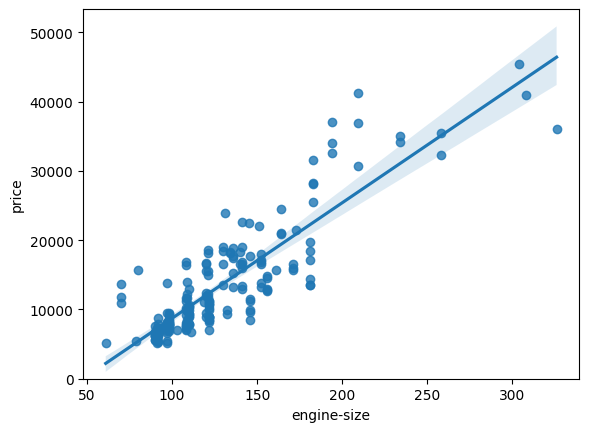

In [8]:
# Engine size as potential predictor variable of price

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

In [9]:
# Examine the correlation between 'engine-size' and 'price'

correlation_matrix = df[["engine-size", "price"]].corr()

# Access the correlation between 'engine-size' and 'price'
correlation_value = correlation_matrix.loc['engine-size', 'price']
print(f"The correlation between 'engine-size' and 'price' is: {correlation_value}")

The correlation between 'engine-size' and 'price' is: 0.8723351674455182


<Axes: xlabel='highway-mpg', ylabel='price'>

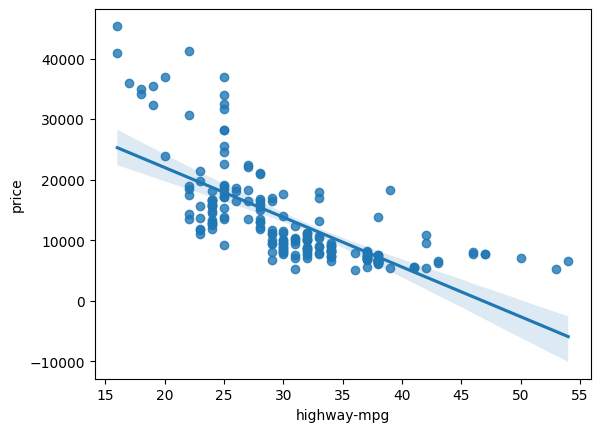

In [10]:
# Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

sns.regplot(x="highway-mpg", y="price", data=df)

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [11]:
# Examine the correlation between 'highway-mpg' and 'price'

correlation_matrix = df[["highway-mpg", "price"]].corr()

# Access the correlation between 'highway-mpg' and 'price'
correlation_value = correlation_matrix.loc['highway-mpg', 'price']
print(f"The correlation between 'highway-mpg' and 'price' is: {correlation_value}")

The correlation between 'highway-mpg' and 'price' is: -0.7046922650589531


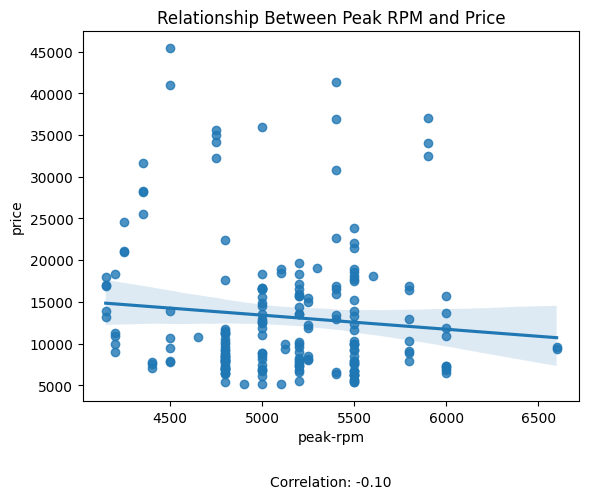

In [14]:
# Examine the correlation between 'peak-rpm' and 'price'

sns.regplot(x="peak-rpm", y="price", data=df)

correlation_matrix = df[["peak-rpm", "price"]].corr()

# Access the correlation between 'peak-rpm' and 'price'
correlation_value = correlation_matrix.loc['peak-rpm', 'price']

# Add the title
plt.title("Relationship Between Peak RPM and Price")

# Add the footnote using plt.text
plt.text(0.5, -0.20, f"Correlation: {correlation_value:.2f}",
         horizontalalignment='center',
         verticalalignment='top',
         transform=plt.gca().transAxes)

# Display the plot
plt.show()

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

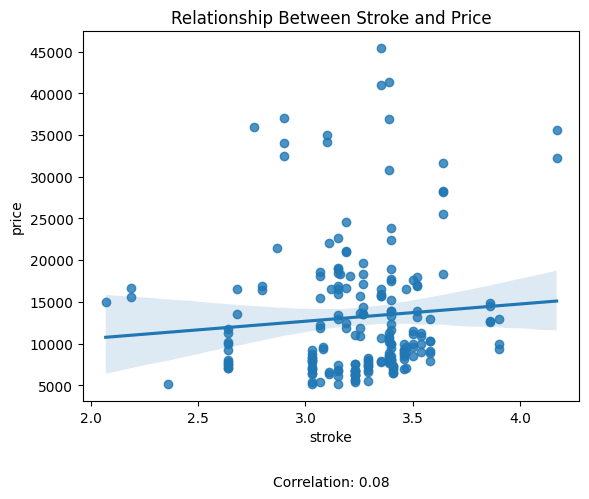

In [15]:
# Examine the correlation between 'stroke' and 'price'

sns.regplot(x="stroke", y="price", data=df)

correlation_matrix = df[["stroke", "price"]].corr()

# Access the correlation between 'stroke' and 'price'
correlation_value = correlation_matrix.loc['stroke', 'price']

# Add the title
plt.title("Relationship Between Stroke and Price")

# Add the footnote using plt.text
plt.text(0.5, -0.20, f"Correlation: {correlation_value:.2f}",
         horizontalalignment='center',
         verticalalignment='top',
         transform=plt.gca().transAxes)

# Display the plot
plt.show()

## Categorical Variables

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

<Axes: xlabel='body-style', ylabel='price'>

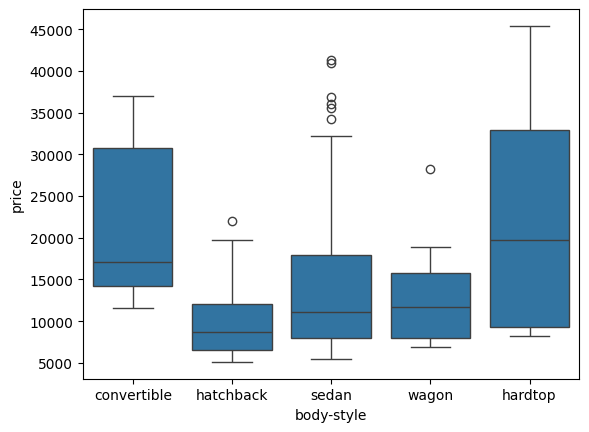

In [23]:
# Let's look at the relationship between "body-style" and "price".

sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.<p>

<Axes: xlabel='engine-location', ylabel='price'>

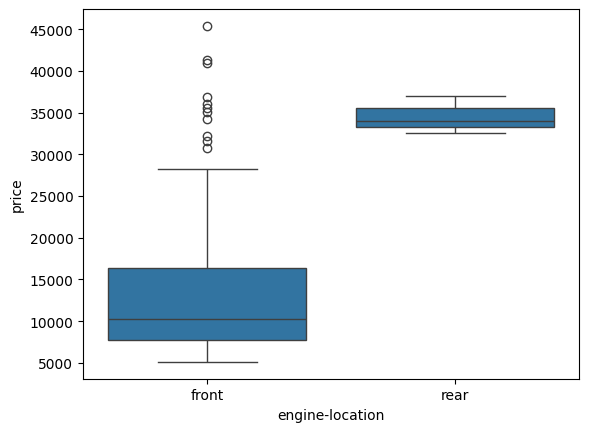

In [24]:
# Let's examine engine "engine-location" and "price".

sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


<Axes: xlabel='drive-wheels', ylabel='price'>

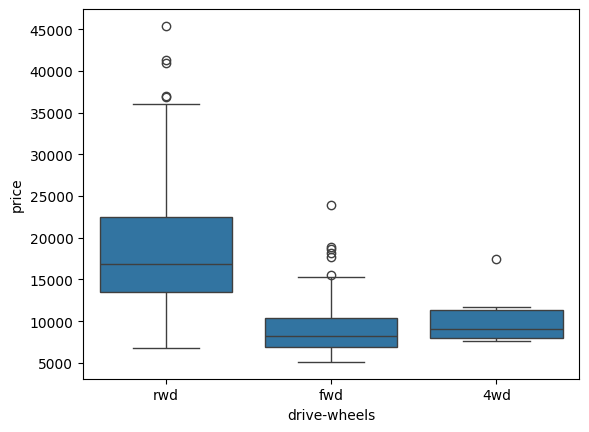

In [25]:
#  Let's examine "drive-wheels" and "price".

sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis

In [22]:
# The describe function automatically computes basic statistics for all continuous variables.

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [26]:
 # We can apply "describe" also for the variables of type 'object'.

 df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


<h3>Value Counts</h3>
<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>

In [32]:
# Examine the Value Counts for drive-wheels.

# Convert the series to a dataframe and save the results to the dataframe "drive_wheels_counts"
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<h3>Grouping</h3>
<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

In [37]:
# Which type of drive wheel is, on average, most valuable?
# We can group "drive-wheels" and then average them.
# Select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

df_group_one = df[['drive-wheels','body-style','price']]

# Then calculate the average price for each of the different categories of data.
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


The rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [39]:
# You can also group by multiple variables.
# For example, let's group by both 'drive-wheels' and 'body-style'.
# This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'.
# We can store the results in the variable 'grouped_test1'.

df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [41]:
# This grouped data is much easier to visualize when it is made into a pivot table.

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')

# We won't have data for some of the pivot cells.
# We can fill these missing cells with the value 0.
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

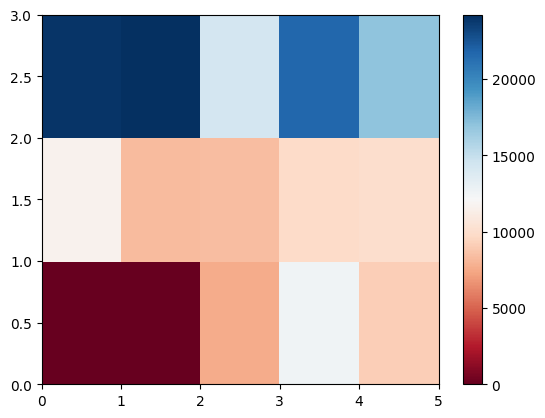

In [42]:
# Let's use a heat map to visualize the relationship between Body Style vs Price.

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

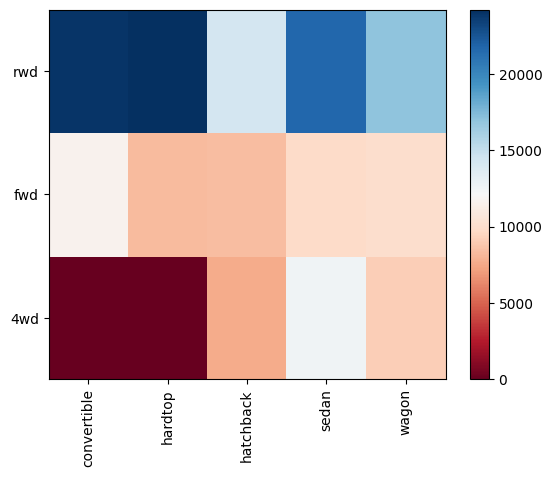

In [44]:
# The default labels convey no useful information to us. Let's change that.

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p><b>Correlation does not imply causation!</b>

 Determining correlation is much simpler, the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b> 1</b>: Perfect positive linear correlation.</li>
    <li><b> 0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

In [46]:
df.select_dtypes(include=['number']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089


<b>P-value</b>
<p>The P-value is the probability value that the correlation between these two variables is statistically significant.</p>
<p>Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>
<ul>
    <li>p-value  < 0.001: strong evidence that the correlation is significant.</li>
    <li>p-value < 0.05: moderate evidence that the correlation is significant.</li>
    <li>p-value < 0.1: weak evidence that the correlation is significant.</li>
    <li>p-value  > 0.1: no evidence that the correlation is significant.</li>
</ul>

In [49]:
# Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081 with a P-value of P = 8.076488270732947e-20


Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [54]:
# Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.27353627065033e-48


Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

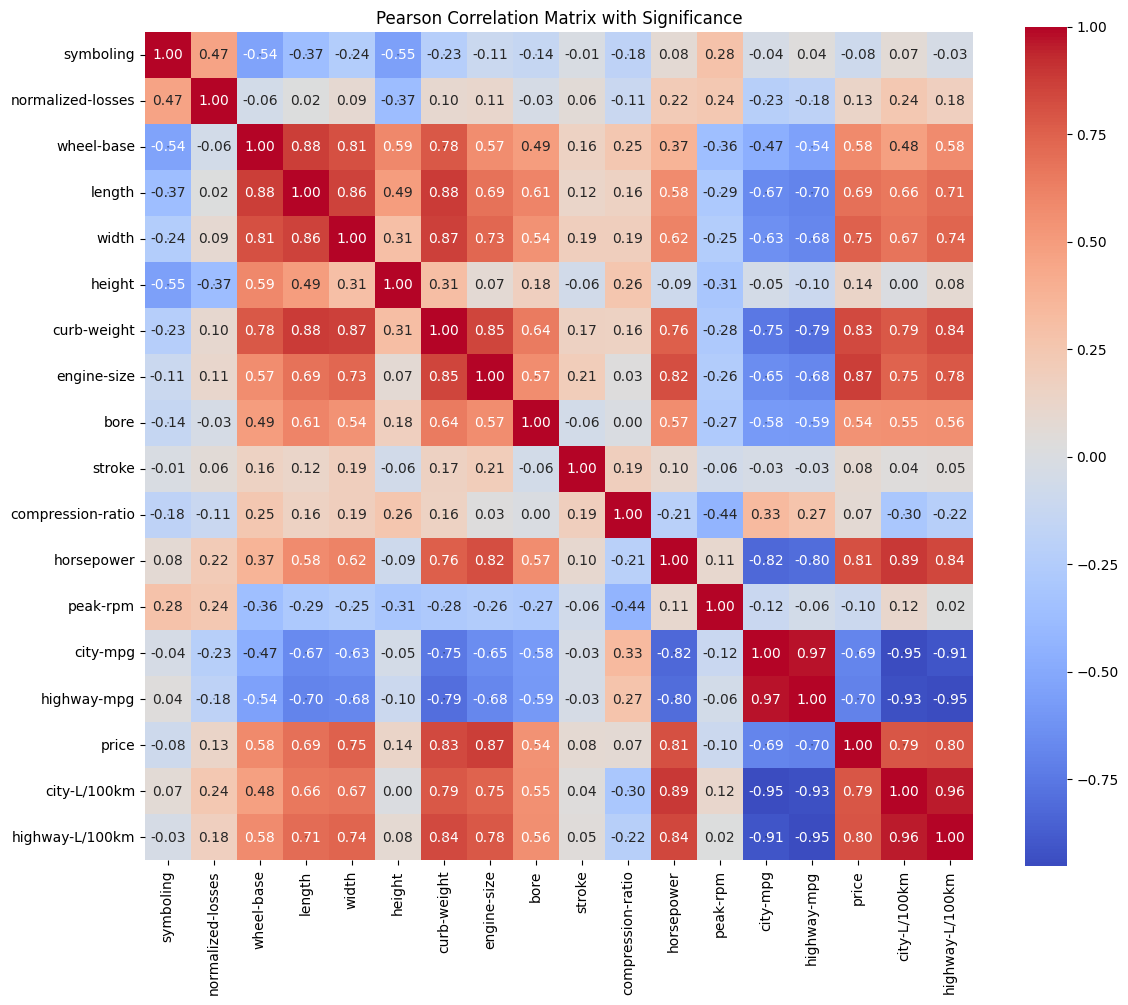

In [65]:
# Calculate Pearson correlation and p-values for the numerical variables
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_cols)

corr_matrix = df_numeric .corr(method='pearson')
p_values = pd.DataFrame(np.zeros_like(corr_matrix.values), columns=corr_matrix.columns, index=corr_matrix.index)

for i in range(len(df_numeric .columns)):
    for j in range(i + 1, len(df_numeric .columns)):
        corr, p = stats.pearsonr(df_numeric .iloc[:, i], df_numeric .iloc[:, j])
        p_values.iloc[i, j] = p
        p_values.iloc[j, i] = p

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add significance markers (optional)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if p_values.iloc[i, j] < 0.05:
            plt.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color='black', fontsize=3)
        elif p_values.iloc[i, j] < 0.01:
            plt.text(j + 0.5, i + 0.5, '**', ha='center', va='center', color='black', fontsize=3)
        elif p_values.iloc[i, j] < 0.001:
            plt.text(j + 0.5, i + 0.5, '***', ha='center', va='center', color='black', fontsize=3)

plt.title('Pearson Correlation Matrix with Significance')
plt.tight_layout()
plt.show()

**Important Variables**

We have narrowed it down to the following variables:

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>